In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
# 랜덤 시드 고정
SEED = 12
random.seed(12)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("시드 고정:", SEED)

시드 고정: 12


In [5]:
from sklearn import datasets
housing = datasets.load_boston()
X_data = housing.data
y_data = housing.target
print(X_data.shape, y_data.shape)

(506, 13) (506,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [6]:
# 피처 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)

X_data_scaled[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

In [7]:
# 학습 데이터셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [15]:
# 심층 신경망
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_model(num_input=1):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_dim=num_input))
  model.add(Dense(64, activation='relu', input_dim=num_input))
  model.add(Dense(32, activation='relu', input_dim=num_input))
  model.add(Dense(16, activation='relu', input_dim=num_input))
  model.add(Dense(1, activation='linear', input_dim=num_input))

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  return model

model = build_model(num_input=13)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1792      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 모델 훈련 - 훈련 데이터를 32개의 배치 단위로 쪼개 학습시킴. 배치 단위로 optimizer를 적용하고 가중치 갱신.
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2) # epochs는 반복 횟수, verbose는 학습 진행상황 보여줄지 여부.

Epoch 1/100
13/13 - 1s - loss: 305.1343 - mae: 13.5211 - 629ms/epoch - 48ms/step
Epoch 2/100
13/13 - 0s - loss: 77.8848 - mae: 6.3798 - 25ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 63.3844 - mae: 5.5993 - 26ms/epoch - 2ms/step
Epoch 4/100
13/13 - 0s - loss: 61.2807 - mae: 5.5630 - 24ms/epoch - 2ms/step
Epoch 5/100
13/13 - 0s - loss: 60.5426 - mae: 5.4286 - 24ms/epoch - 2ms/step
Epoch 6/100
13/13 - 0s - loss: 61.7624 - mae: 5.6395 - 28ms/epoch - 2ms/step
Epoch 7/100
13/13 - 0s - loss: 56.4691 - mae: 5.1433 - 27ms/epoch - 2ms/step
Epoch 8/100
13/13 - 0s - loss: 59.1625 - mae: 5.5081 - 26ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 55.9791 - mae: 5.2428 - 27ms/epoch - 2ms/step
Epoch 10/100
13/13 - 0s - loss: 52.5340 - mae: 5.1014 - 30ms/epoch - 2ms/step
Epoch 11/100
13/13 - 0s - loss: 56.9317 - mae: 5.2044 - 28ms/epoch - 2ms/step
Epoch 12/100
13/13 - 0s - loss: 56.9475 - mae: 5.4524 - 30ms/epoch - 2ms/step
Epoch 13/100
13/13 - 0s - loss: 61.9501 - mae: 5.7390 - 29ms/epoch - 

In [17]:
# 평가
model.evaluate(X_test, y_test)
# 검증 손실이 훈련 손실보다 크므로 과대적합으로 판단됨.
# batch 크기에 따라 모델 성능이 달라질 수 있으므로 중요하게 고려해야함.

4/4 [==============================] - 0s 3ms/step - loss: 23.8069 - mae: 3.3731


[23.806941986083984, 3.373112916946411]

In [19]:
# 교차검증
model = build_model(num_input=13)
history = model.fit(X_train, y_train, batch_size=32, epochs=200, 
                    validation_split=0.25, verbose=2)
# 훈련 손실이 검증 손실보다 작은 값이므로 과대적합으로 판단.

Epoch 1/200
10/10 - 1s - loss: 5715.3228 - mae: 62.3710 - val_loss: 294.1566 - val_mae: 15.6443 - 644ms/epoch - 64ms/step
Epoch 2/200
10/10 - 0s - loss: 240.4251 - mae: 13.1417 - val_loss: 154.3676 - val_mae: 9.0515 - 56ms/epoch - 6ms/step
Epoch 3/200
10/10 - 0s - loss: 121.5876 - mae: 7.8386 - val_loss: 68.9465 - val_mae: 7.0150 - 58ms/epoch - 6ms/step
Epoch 4/200
10/10 - 0s - loss: 91.2776 - mae: 7.7018 - val_loss: 61.4966 - val_mae: 5.2658 - 55ms/epoch - 5ms/step
Epoch 5/200
10/10 - 0s - loss: 76.6804 - mae: 5.9125 - val_loss: 56.3639 - val_mae: 5.7794 - 56ms/epoch - 6ms/step
Epoch 6/200
10/10 - 0s - loss: 73.2877 - mae: 6.5077 - val_loss: 56.0405 - val_mae: 5.2866 - 49ms/epoch - 5ms/step
Epoch 7/200
10/10 - 0s - loss: 71.0953 - mae: 5.6445 - val_loss: 54.8338 - val_mae: 5.7072 - 61ms/epoch - 6ms/step
Epoch 8/200
10/10 - 0s - loss: 71.8318 - mae: 6.4014 - val_loss: 55.2615 - val_mae: 5.0700 - 62ms/epoch - 6ms/step
Epoch 9/200
10/10 - 0s - loss: 70.1495 - mae: 5.6003 - val_loss: 52.3

In [21]:
import matplotlib.pyplot as plt
def plot_loss_curve(total_epoch=10, start=1):
  plt.figure(figsize=(5,5))
  plt.plot(range(start, total_epoch + 1), history.history['loss'][start-1:total_epoch],
           label='Train')
  plt.plot(range(start, total_epoch+1), history.history['val_loss'][start-1:total_epoch],
           label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('loss(mse)')
  plt.legend()
  plt.show()

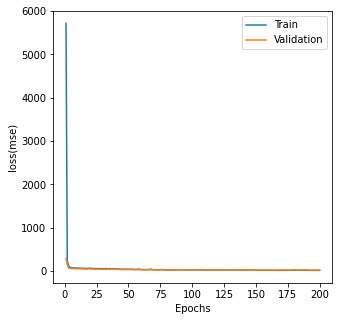

In [22]:
plot_loss_curve(total_epoch=200, start=1)

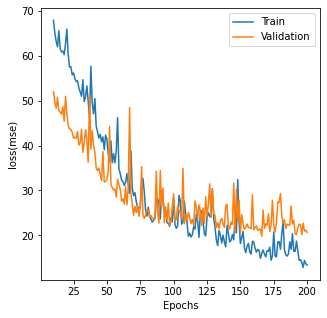

In [24]:
plot_loss_curve(total_epoch=200, start=10)